<a href="https://colab.research.google.com/github/KSR313/Ml_TimeSeries/blob/main/ML_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[link text](https://builtin.com/data-science/time-series-forecasting-python)

# **A Guide to Time Series Forecasting in Python:**

## Initialization


###  Import the dependencies

In [1]:
# to read finance data
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

# to work with data
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# to show a chart of data
import matplotlib.pyplot as plt
import seaborn as sns

# to convert date
import datetime


### Import Data


In [3]:
# fetch data
btc_data = pdr.get_data_yahoo(['BTC-USD'],
                          start=datetime.datetime(2020, 2, 2),
                          end=datetime.datetime(2023, 4, 4))['Close']

# convert to csv
btc_data.to_csv("btc.csv")
btc = pd.read_csv("btc.csv")

# indexing by day
btc.index = pd.to_datetime(btc['Date'], format='%Y-%m-%d')

# cleanup
del btc['Date']
print(btc.head())

[*********************100%%**********************]  1 of 1 completed
                  Close
Date                   
2020-02-02  9344.365234
2020-02-03  9293.521484
2020-02-04  9180.962891
2020-02-05  9613.423828
2020-02-06  9729.801758


Splitting Data

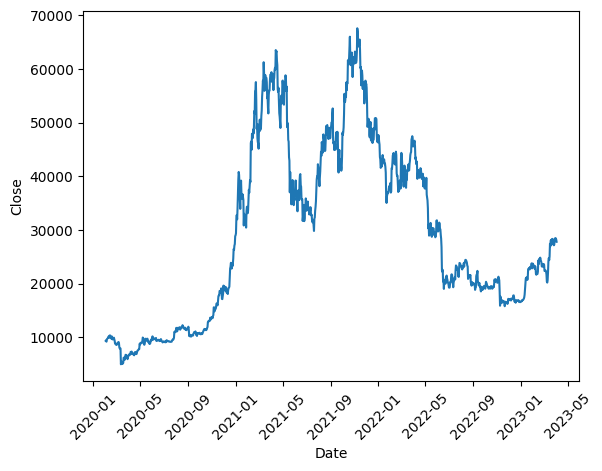

In [4]:
plt.ylabel('Close')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.plot(btc.index, btc, )

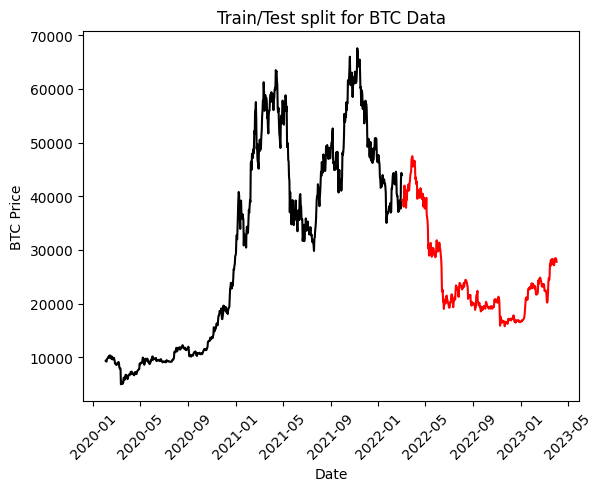

In [6]:
pivot_date = "2022-03-03"
train = btc[btc.index < pd.to_datetime(pivot_date, format='%Y-%m-%d')]
test = btc[btc.index > pd.to_datetime(pivot_date, format='%Y-%m-%d')]

plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

Autoregressive Moving Average (ARMA)

In [7]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
y = train

In [ ]:
ARMAmodel = SARIMAX(y, order = (1, 0, 1))

In [ ]:
ARMAmodel = ARMAmodel.fit()

In [11]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]

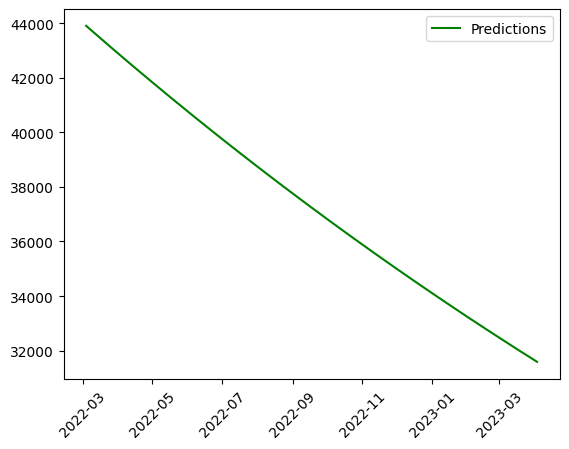

In [12]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.xticks(rotation=45)
plt.legend()

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  13939.243774895858


# Autoregressive Integrated Moving Average (ARIMA)

In [14]:
from statsmodels.tsa.arima.model import ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


RMSE:  32339.76601201511


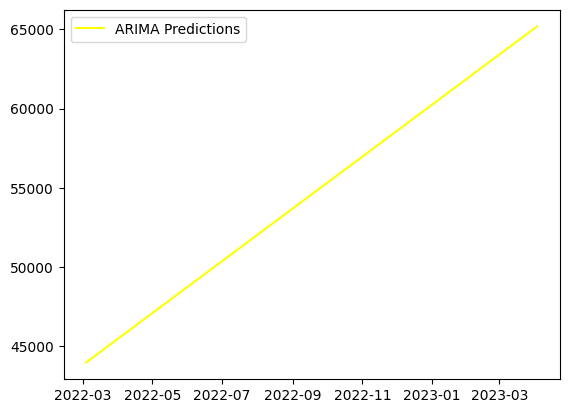

In [15]:
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

# Seasonal ARIMA (SARIMA)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


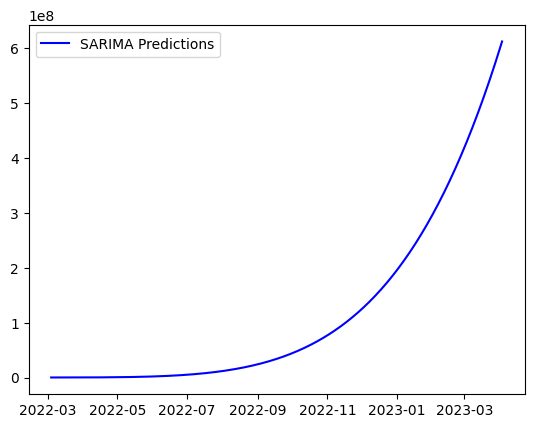

In [16]:
SARIMAXmodel = SARIMAX(y, order = (5, 4, 2), seasonal_order = (2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()